## Train Agent on Osu Environment using Vanilla DQN

In [1]:
from environment import OsuEnvironment
from agent import Agent
from model import DQN
import torch
import torch.nn as nn
import torch.optim as optim
import os
import warnings
import logging

if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5
    !pip install -r yolov5/requirements.txt

warnings.simplefilter("ignore", FutureWarning)
logging.getLogger('ultralytics').setLevel(logging.ERROR)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# define arguments for Agent
env = OsuEnvironment()
dueling_dqn = False
noisy_dqn = False

policy_net = DQN(env.observation_space.shape[0], env.observation_space.shape[1], env.action_space.nvec, dueling=dueling_dqn, noisy=noisy_dqn).to(device)
target_net = DQN(env.observation_space.shape[0], env.observation_space.shape[1], env.action_space.nvec, dueling=dueling_dqn, noisy=noisy_dqn).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.SGD(policy_net.parameters(), lr=0.001, momentum=0.9)
criterion = nn.SmoothL1Loss()

agent = Agent(env, policy_net, target_net, criterion, optimizer, epsilon_decay=50000,noisy_dqn=noisy_dqn)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\bohui/.cache\torch\hub\master.zip
YOLOv5  2024-11-18 Python-3.11.5 torch-2.5.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Listening on 127.0.0.1:5555


In [3]:
agent.train(total_episode=100)

Epsiode: 10: Total Reward: -915, Loss: 3.269200206804676
Average running time: 0.07296649931055127 per step
Epsiode: 20: Total Reward: -172, Loss: 5.34820327758789
Average running time: 0.07794006105879663 per step
Epsiode: 30: Total Reward: -140, Loss: 8.109239965677261
Average running time: 0.07998759405953544 per step
Epsiode: 40: Total Reward: -2028, Loss: 8.210750647698449
Average running time: 0.07388649854641371 per step
Epsiode: 50: Total Reward: -171, Loss: 7.622491297514542
Average running time: 0.07572735187619231 per step
Epsiode: 60: Total Reward: -2236, Loss: 8.94845511151009
Average running time: 0.0726733943759995 per step
Epsiode: 70: Total Reward: -387, Loss: 9.377218811328595
Average running time: 0.07433124730795508 per step
Epsiode: 80: Total Reward: -119, Loss: 8.071178300040108
Average running time: 0.07674158629724535 per step
Epsiode: 90: Total Reward: -295, Loss: 10.389095597150849
Average running time: 0.07354493630238068 per step
Epsiode: 100: Total Reward: 

In [4]:
# ensure inline ploting is enable
%matplotlib inline

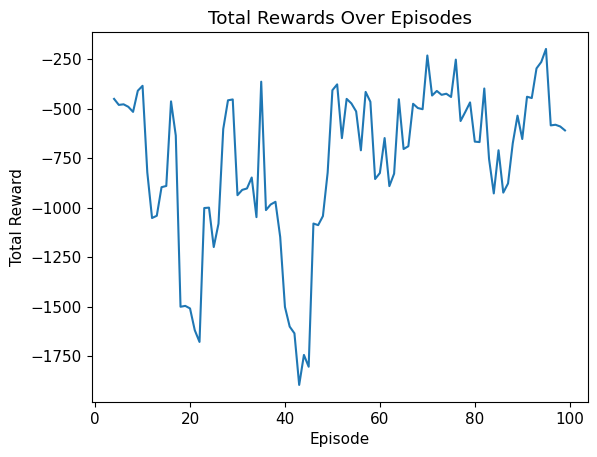

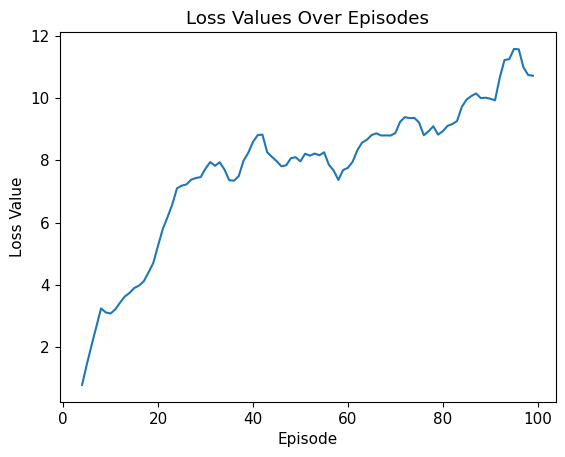

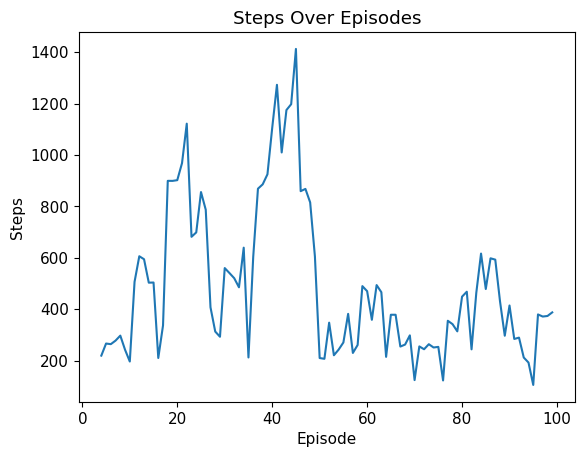

In [5]:
agent.plot()

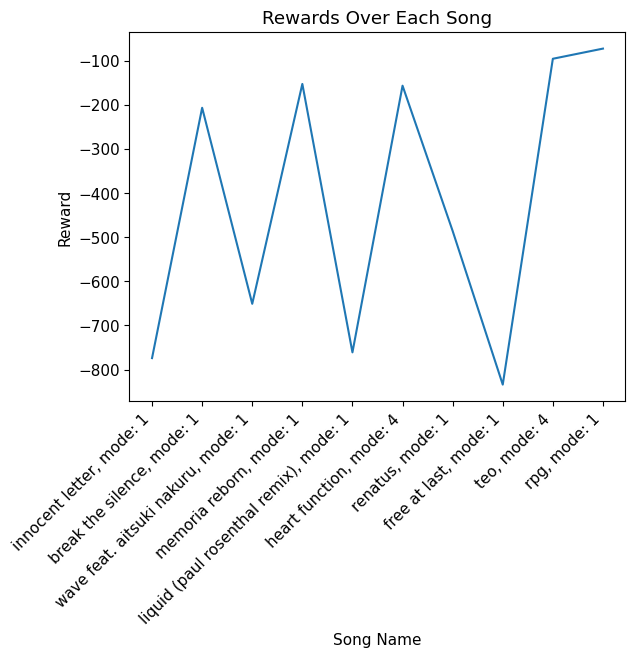

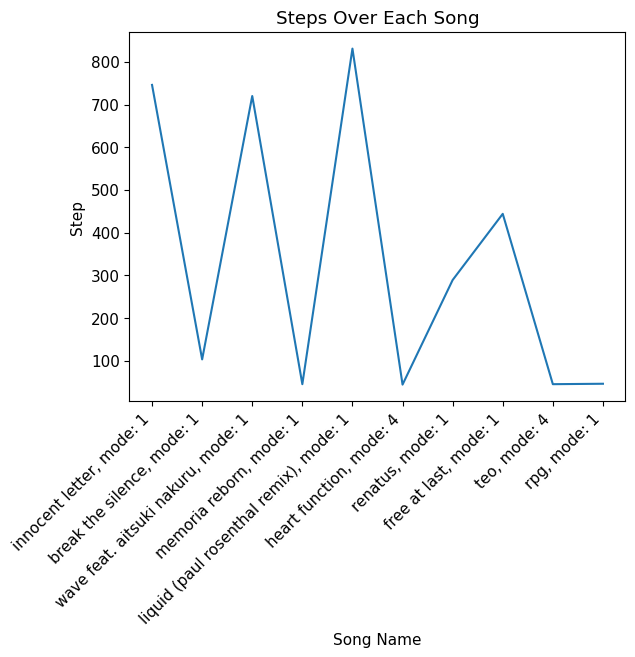

Connection reset by ('127.0.0.1', 64331)


In [ ]:
agent.eval(total_episode=10)